In [14]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 10359743.25it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 307436.17it/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3470942.64it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4552097.67it/s]


Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw

epoch:  1  loss: 0.04368503
epoch:  6  loss: 0.03627170
epoch: 11  loss: 0.03492732
epoch: 16  loss: 0.03434159
epoch: 20  loss: 0.03435200


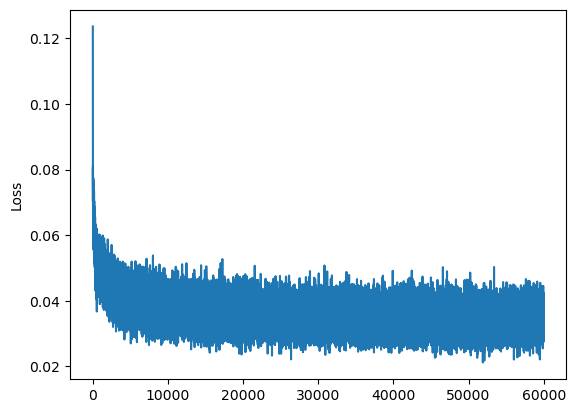

In [15]:
# Load MNIST dataset
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='data', train=True, transform=transform)
trainloader = DataLoader(train_data, batch_size=20, shuffle=True)

# Modify Model
class Model(nn.Module):
    def __init__(self, in_features=784, out_features=3):
        super().__init__()
        self.enc1 = nn.Linear(in_features, 128)
        self.enc2 = nn.Linear(128, 64)
        self.enc3 = nn.Linear(64, out_features)
        self.dec1 = nn.Linear(out_features, 64)
        self.dec2 = nn.Linear(64, 128)
        self.dec3 = nn.Linear(128, in_features)

    def forward(self, x):S
        x = F.relu(self.enc1(x))
        x = F.relu(self.enc2(x))
        x = F.sigmoid(self.enc3(x))  # Latent space
        x = F.relu(self.dec1(x))
        x = F.relu(self.dec2(x))
        return self.dec3(x)S

    def encode(self, x):
        x = F.relu(self.enc1(x))
        x = F.relu(self.enc2(x))
        return F.sigmoid(self.enc3(x))

# Initialize model, loss, and optimizer
model = Model()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model (similar to your existing code)
losses = []
model.train()
for i in range(20):  # Adjust number of epochs as needed
    for batch_idx, (data, _) in enumerate(trainloader):
        data = data.view(-1, 784)  # Flatten images
        y_pred = model(data)
        loss = criterion(y_pred, data)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if (i % 5 == 0):
        print(f'epoch: {i+1:2}  loss: {np.mean(losses[-100:]):10.8f}')
print(f'epoch: 20  loss: {np.mean(losses[-100:]):10.8f}')

# Plot the loss function
plt.plot(range(len(losses)), losses)
plt.ylabel('Loss')
plt.show()

In [19]:
# Get latent space representation for test data
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)
testloader = DataLoader(test_data, batch_size=10000, shuffle=False)  # Load all test data
with torch.no_grad():
    for data, labels in testloader:
        data = data.view(-1, 784)
        code = model.encode(data)
        labels = labels.numpy()
        break  # Only need one batch for all test data

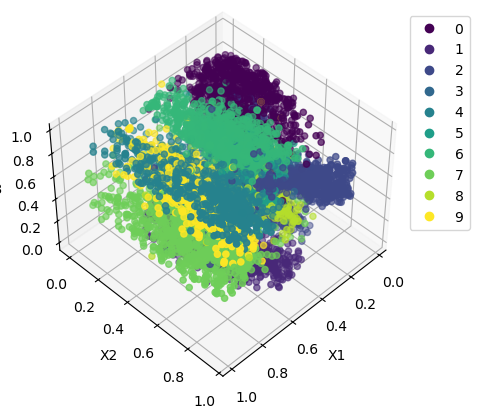

In [21]:
# 3D plot of latent space
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
m = np.reshape(np.asarray(code), (-1, 3))
xs = m[:, 0]
ys = m[:, 1]
zs = m[:, 2]
scatter = ax.scatter(xs, ys, zs, c=labels)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.2, 1))
ax.view_init(45, 45)
plt.show()